In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load Dataset
df = pd.read_csv(r"C:\Users\Admin\Downloads\NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [11]:
# Dataset First Look
print(df.head())

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4   

In [12]:
# Dataset Rows & Columns count
print(df.shape)

(7787, 12)


In [14]:
# Dataset Information
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB
None


In [15]:
# Dataset Missing Value Count
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [16]:
# Dataset Duplicate Value Count
print(df.duplicated().sum())

0


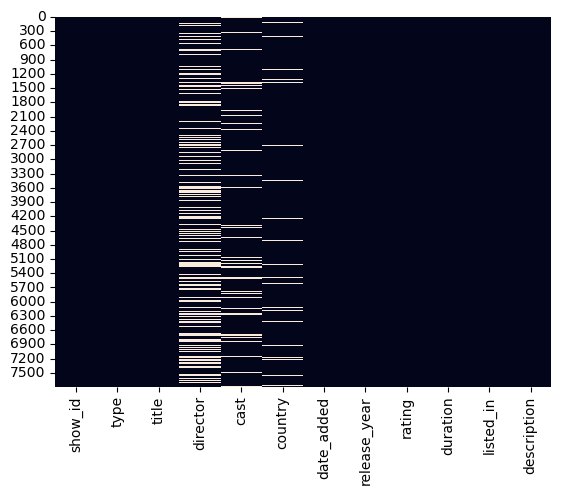

In [17]:
# Visualizing the missing values (This helps to see the pattern of missing data)
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [18]:
# Fill missing country values with 'Unknown'
df['country'] = df['country'].fillna('Unknown')

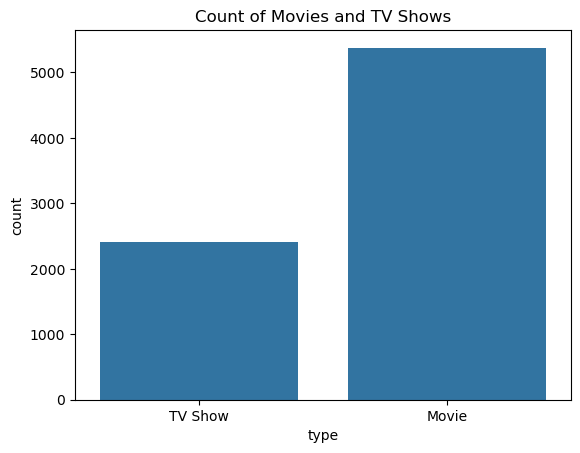

In [19]:
# Chart visualization code
sns.countplot(x='type', data=df)
plt.title('Count of Movies and TV Shows')
plt.show()

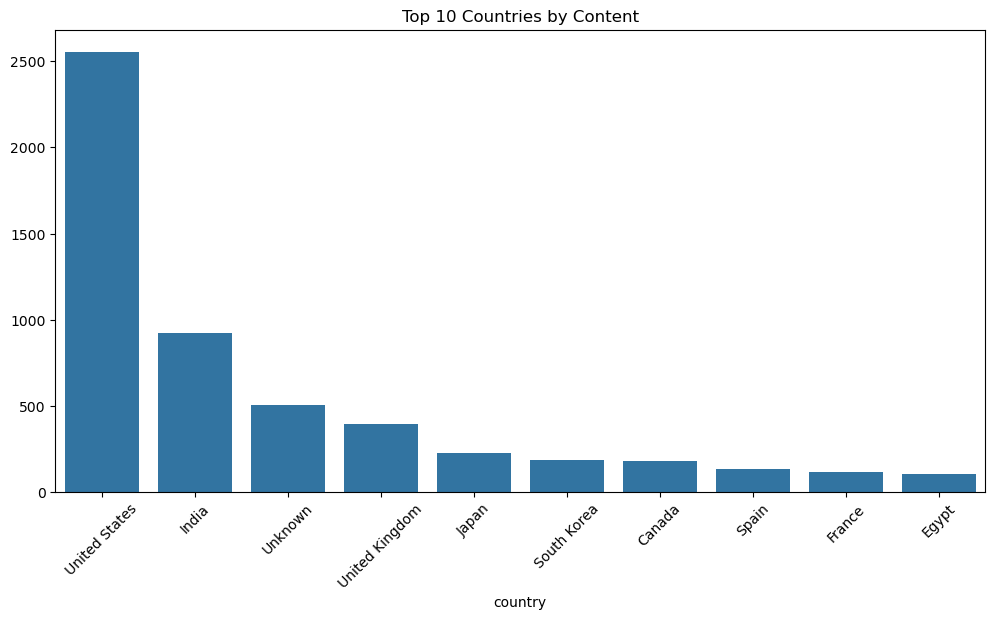

In [20]:
# Chart visualization code
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries by Content')
plt.xticks(rotation=45)
plt.show()

In [24]:
# Convert 'date_added' to datetime format, handling any errors
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Now, extract the year from the cleaned 'date_added' column
df['year_added'] = df['date_added'].dt.year

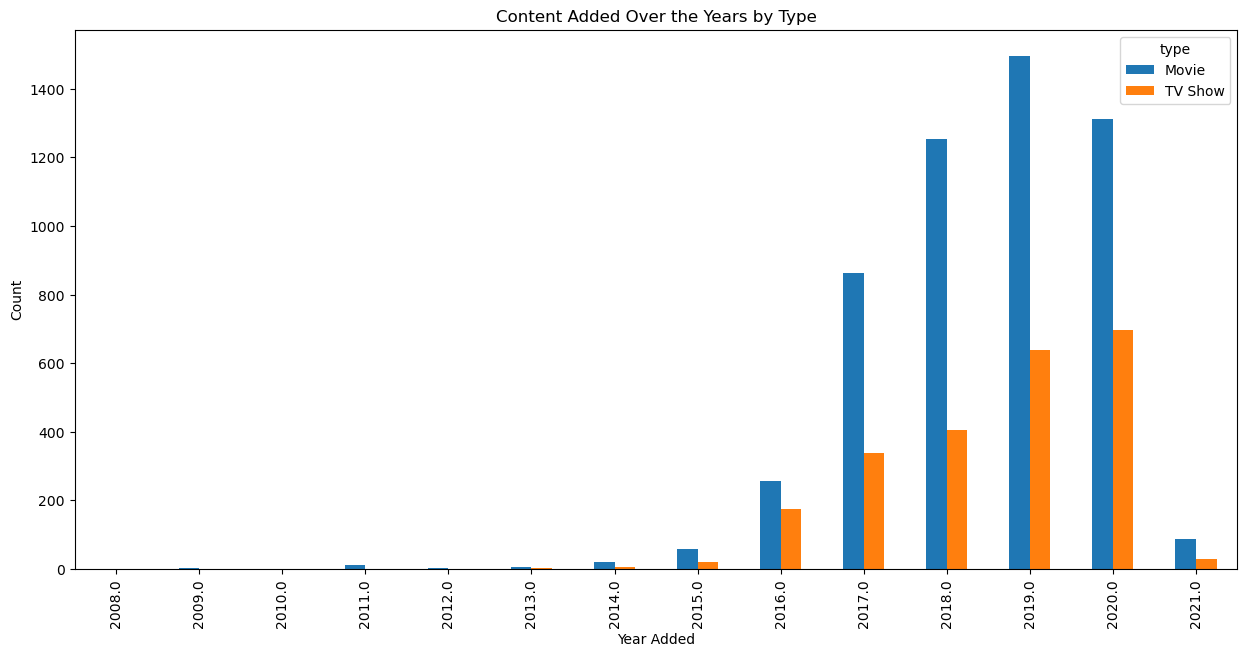

In [25]:
# Chart visualization code
content_by_year = df.groupby(['year_added', 'type']).size().unstack()
content_by_year.plot(kind='bar', figsize=(15, 7))
plt.title('Content Added Over the Years by Type')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.show()